# Un progetto dall'inizio alla fine: lavoriamo con dati reali

Siete stati assunti come Data Specialist da una azienda che svolge analisi statistiche del mercato immobiliare americano. Ecco gli step che realizzeremo in questo progetto: Il vostro compito e' predirre il prezzo di una casa in california dato il numero di stanze e la posizione e altre caratteristiche. <br>

La checklist semplificata del progetto sara':

- [] Guardiamo al quadro generale (Big Picture)
- [] Procuriamoci i dati
- [] Analizziamo e visualizziamo i dati per acquisirne consapevolezza
- [] Prepara i dati per l'algoritmo di Machine Learning
- [] Seleziona il modello e addesteralo
- [] Ottimizza il modello con una messa a punto 
- [] Presenta la soluzione
- [] Lancia, Monitora e Mantieni il tuo modello

## 1 - The Big Picture, inquadriamo il problema
### 1.1 - La fonte dei dati:
- Repository popolari:
    - [Irvine](https://archive.ics.uci.edu)
    - [Kaggle](https://www.kaggle.com)
    - [Amazone AWS](https://registry.opendata.aws)
- Meta Portali:
    - [Data Portals](https://dataportals.org)
    - [Open Data Watch](https://opendatawatch.com/monitoring/)
    - [Quandl](https://data.nasdaq.com/publishers/QDL)
- Raccolte di link a repo:
    - [Quora](https://www.quora.com/Where-can-I-find-large-datasets-open-to-the-public)
    - [Wikipedia](https://en.wikipedia.org/wiki/List_of_datasets_for_machine-learning_research)
    - [Reddit](https://www.reddit.com/r/datasets/) 

### 1.2 - Procuriamoci i dati:
Per il download dei dati da web e' sempre conveniente scrivere una funzione che possa essere richiamata in automatcoa seconda delle esigenze.


In [143]:
# Download dei dati
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
import matplotlib.pyplot as plt

def load_housing_data():
    """
    Carica il dataset degli alloggi.

    Output:
    DataFrame: Un DataFrame di pandas contenente i dati degli alloggi.

    Descrizione:
    Questa funzione verifica se il file 'housing.tgz' esiste nel percorso specificato. 
    Se il file non esiste, lo scarica da un URL fornito, lo estrae e legge il file CSV 
    'housing.csv' da una directory specificata, restituendo infine i dati in un DataFrame di pandas.
    """

    # Percorso del file tarball
    tarball_path = Path("datasets/housing.tgz")

    # Se il file non esiste, scarica ed estrai i dati
    if not tarball_path.is_file():
        # Crea la directory se non esiste
        Path("datasets").mkdir(parents=True, exist_ok=True)
        
        # URL da cui scaricare i dati
        url = "https://github.com/ageron/data/raw/main/housing.tgz"

        # Scarica il file tarball
        urllib.request.urlretrieve(url, tarball_path)

        # Estrae il file tarball
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    
    # Legge il file CSV e lo restituisce come un DataFrame
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [144]:
housing.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


### Analisi e valutazione dei dati
Significato di ciascuna colonna
-   **longitude:** longitudine della posizione dell'alloggio
-   **latitude:** latitudine della posizione dell'alloggio
-   **housing_median_age:** età media degli alloggi nella zona
-   **total_rooms:** numero totale delle stanze nel quartiere
-   **total_bedrooms:** numero totale delle camere da letto nel quartiere
-   **population:** popolazione totale nella zona
-   **households:** numero totale di famiglie nella zona
-   **median_income:** reddito medio delle famiglie nella zona
-   **median_house_value:** valore medio delle case nella zona
-   **ocean_proximity:** prossimità all'oceano

In [145]:
print(f'Il Dataset ha {housing.shape[0]} istanze e {housing.shape[1]} attributi.')

Il Dataset ha 20640 istanze e 10 attributi.


In [146]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [147]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


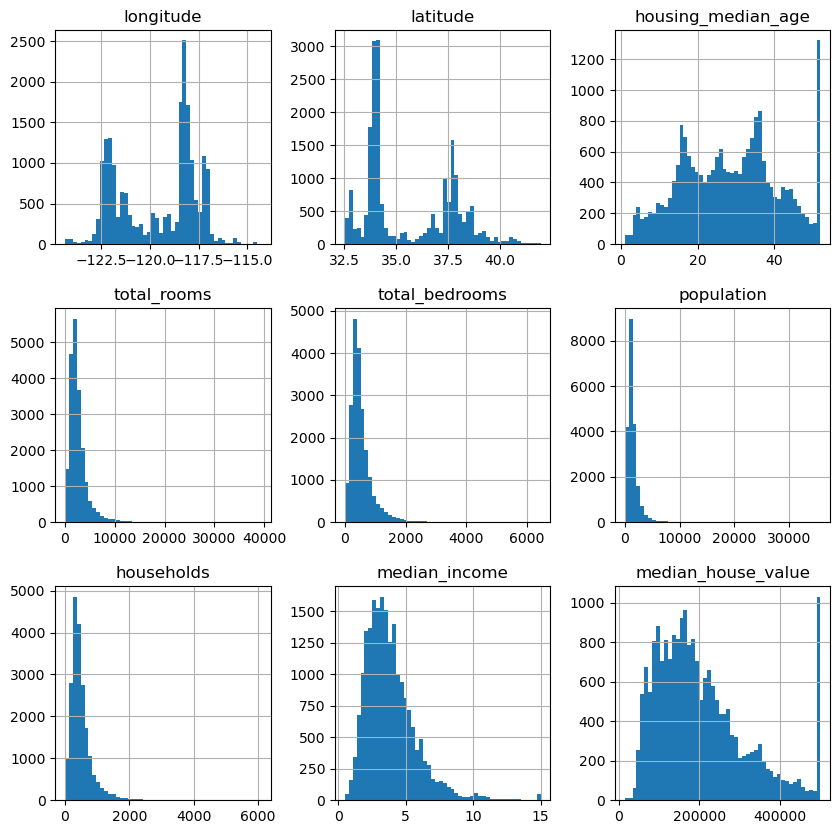

In [148]:
housing.hist(bins=50,figsize=(10,10));

In [149]:
#Attenzione alle grandezze 'capped'
# Meglio normalizzare i dati, le campane simmetriche funzionano meglio

In [150]:
housing.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [151]:
# total_bedrooms contiene valori di tipo NAN NotANumber o 'None', questo attributo dovrà essere gestito 
housing.total_bedrooms


0         129.0
1        1106.0
2         190.0
3         235.0
4         280.0
          ...  
20635     374.0
20636     150.0
20637     485.0
20638     409.0
20639     616.0
Name: total_bedrooms, Length: 20640, dtype: float64

### Creazione di un TestSet
Prima guardare oltre nei dati e' molto importante separare una certa qauntita' di dati e metterla da parte senza toccarla. <br>
Sarebbe importante che il test set sia mediamente rappresentativo di ciascun attributo. Se il dataset non e' molto grande potrebbe essere necessario crare un test set stratifiato.  

In [152]:
from sklearn.model_selection import train_test_split

housing_train ,housing_test = train_test_split(housing,train_size=0.8, test_size = 0.2 , random_state = 42,)
print(f'Train set: {housing_train.shape}')
print(f'Test set: {housing_test.shape}')

Train set: (16512, 10)
Test set: (4128, 10)


In [153]:
housing_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.22,32.75,34.0,6001.0,1111.0,2654.0,1072.0,4.5878,291000.0,NEAR OCEAN
8267,-117.03,32.69,10.0,901.0,163.0,698.0,167.0,4.6648,156100.0,NEAR OCEAN
17445,-122.27,37.74,28.0,6909.0,1554.0,2974.0,1484.0,3.6875,353900.0,NEAR BAY
14265,-121.82,37.25,25.0,4021.0,634.0,2178.0,650.0,5.1663,241200.0,<1H OCEAN
2271,-115.98,33.32,8.0,240.0,46.0,63.0,24.0,1.4688,53800.0,INLAND


In [154]:
housing = housing_train.copy() #da questo momento housing contiene solo il nostro trainig data set composto dall' 80% dei dati dell'housing iniziale
print(housing.shape)
housing.ocean_proximity.value_counts()

(16512, 10)


ocean_proximity
<1H OCEAN     7313
INLAND        5276
NEAR OCEAN    2091
NEAR BAY      1827
ISLAND           5
Name: count, dtype: int64

### Exploring Data

<Axes: xlabel='longitude', ylabel='latitude'>

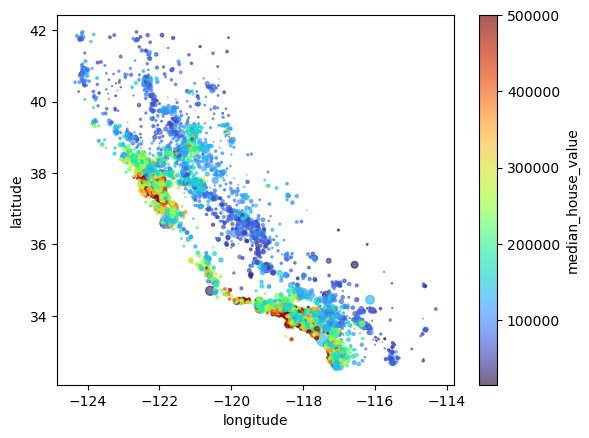

In [155]:
housing.plot.scatter(x = 'longitude', y = 'latitude',s= housing['population']/300,c= 'median_house_value', alpha=0.65, cmap='turbo')

### Correlations

In [156]:
correlation_housing = housing.drop(columns='ocean_proximity')
correlation_housing = correlation_housing.corr() # oppure uso numeric only
correlation_housing.style.background_gradient(cmap= 'jet')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924341,-0.110786,0.043100,0.069439,0.100706,0.056318,-0.014592,-0.043603
latitude,-0.924341,1.000000,0.012640,-0.036327,-0.069283,-0.110514,-0.073915,-0.079259,-0.146324
housing_median_age,-0.110786,0.012640,1.000000,-0.362433,-0.318544,-0.291842,-0.301198,-0.118410,0.104714
total_rooms,0.043100,-0.036327,-0.362433,1.000000,0.928199,0.851766,0.916265,0.197326,0.134060
total_bedrooms,0.069439,-0.069283,-0.318544,0.928199,1.000000,0.873484,0.979627,-0.011782,0.049993
population,0.100706,-0.110514,-0.291842,0.851766,0.873484,1.000000,0.903045,0.000883,-0.025820
households,0.056318,-0.073915,-0.301198,0.916265,0.979627,0.903045,1.000000,0.009366,0.065798
median_income,-0.014592,-0.079259,-0.118410,0.197326,-0.011782,0.000883,0.009366,1.000000,0.687013
median_house_value,-0.043603,-0.146324,0.104714,0.134060,0.049993,-0.025820,0.065798,0.687013,1.000000


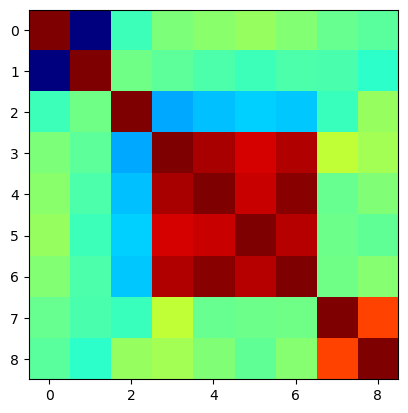

In [157]:
plt.imshow(correlation_housing, cmap='jet', interpolation= 'None')
plt.show()

In [158]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [159]:
correlation_housing = housing[[ 'total_rooms',
                                'total_bedrooms',
                                'population',
                                'households',
                                'median_income',
                                'median_house_value']]

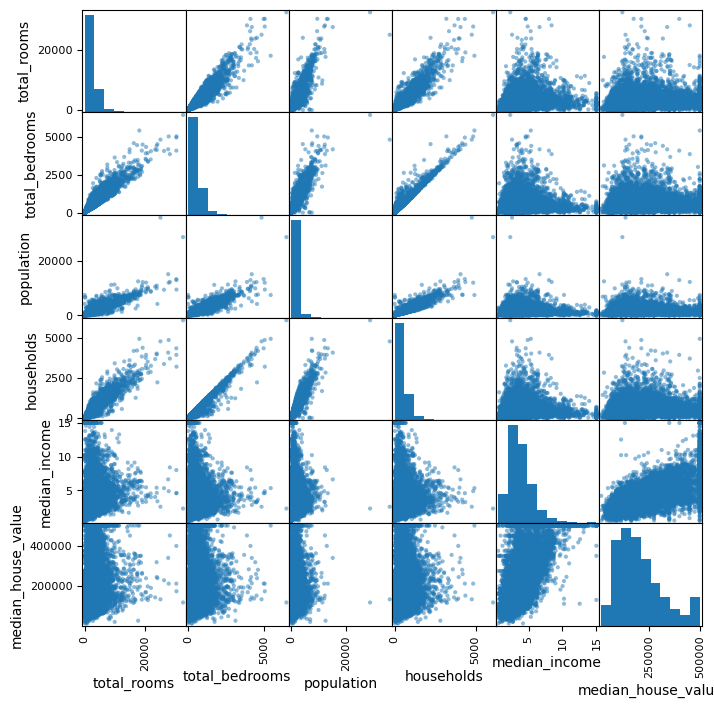

In [160]:
pd.plotting.scatter_matrix(correlation_housing,figsize=(8,8));

In [161]:
#def feature():

housing['bedroom_per_rooms'] = housing['total_bedrooms']/housing['total_rooms']
housing['room_per_population'] = housing['total_rooms']/housing['population']
housing['room_per_households'] = housing['total_rooms']/housing['households']

housing


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bedroom_per_rooms,room_per_population,room_per_households
14196,-117.22,32.75,34.0,6001.0,1111.0,2654.0,1072.0,4.5878,291000.0,NEAR OCEAN,0.185136,2.261115,5.597948
8267,-117.03,32.69,10.0,901.0,163.0,698.0,167.0,4.6648,156100.0,NEAR OCEAN,0.180910,1.290831,5.395210
17445,-122.27,37.74,28.0,6909.0,1554.0,2974.0,1484.0,3.6875,353900.0,NEAR BAY,0.224924,2.323134,4.655660
14265,-121.82,37.25,25.0,4021.0,634.0,2178.0,650.0,5.1663,241200.0,<1H OCEAN,0.157672,1.846189,6.186154
2271,-115.98,33.32,8.0,240.0,46.0,63.0,24.0,1.4688,53800.0,INLAND,0.191667,3.809524,10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,-122.37,37.94,49.0,969.0,229.0,599.0,195.0,1.3167,71600.0,NEAR BAY,0.236326,1.617696,4.969231
11964,-118.38,33.89,35.0,1778.0,330.0,732.0,312.0,6.5745,379300.0,<1H OCEAN,0.185602,2.428962,5.698718
5390,-119.33,36.28,16.0,2624.0,527.0,1077.0,520.0,2.1250,104200.0,INLAND,0.200838,2.436397,5.046154
860,-117.19,34.08,22.0,2467.0,555.0,1567.0,494.0,2.6536,84700.0,INLAND,0.224970,1.574346,4.993927


In [162]:
correlation_housing = housing.drop(columns='ocean_proximity')
correlation_housing = correlation_housing.corr() # oppure uso numeric only
correlation_housing.style.background_gradient(cmap= 'jet')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedroom_per_rooms,room_per_population,room_per_households
longitude,1.000000,-0.924341,-0.110786,0.043100,0.069439,0.100706,0.056318,-0.014592,-0.043603,0.094710,-0.082636,-0.033740
latitude,-0.924341,1.000000,0.012640,-0.036327,-0.069283,-0.110514,-0.073915,-0.079259,-0.146324,-0.117208,0.147253,0.111386
housing_median_age,-0.110786,0.012640,1.000000,-0.362433,-0.318544,-0.291842,-0.301198,-0.118410,0.104714,0.136305,-0.105363,-0.149316
total_rooms,0.043100,-0.036327,-0.362433,1.000000,0.928199,0.851766,0.916265,0.197326,0.134060,-0.185405,0.122000,0.126383
total_bedrooms,0.069439,-0.069283,-0.318544,0.928199,1.000000,0.873484,0.979627,-0.011782,0.049993,0.096396,0.049676,-0.004419
population,0.100706,-0.110514,-0.291842,0.851766,0.873484,1.000000,0.903045,0.000883,-0.025820,0.044445,-0.142248,-0.075141
households,0.056318,-0.073915,-0.301198,0.916265,0.979627,0.903045,1.000000,0.009366,0.065798,0.076661,-0.033870,-0.084997
median_income,-0.014592,-0.079259,-0.118410,0.197326,-0.011782,0.000883,0.009366,1.000000,0.687013,-0.617190,0.227433,0.313640
median_house_value,-0.043603,-0.146324,0.104714,0.134060,0.049993,-0.025820,0.065798,0.687013,1.000000,-0.254817,0.201655,0.146940
bedroom_per_rooms,0.094710,-0.117208,0.136305,-0.185405,0.096396,0.044445,0.076661,-0.617190,-0.254817,1.000000,-0.265425,-0.404399


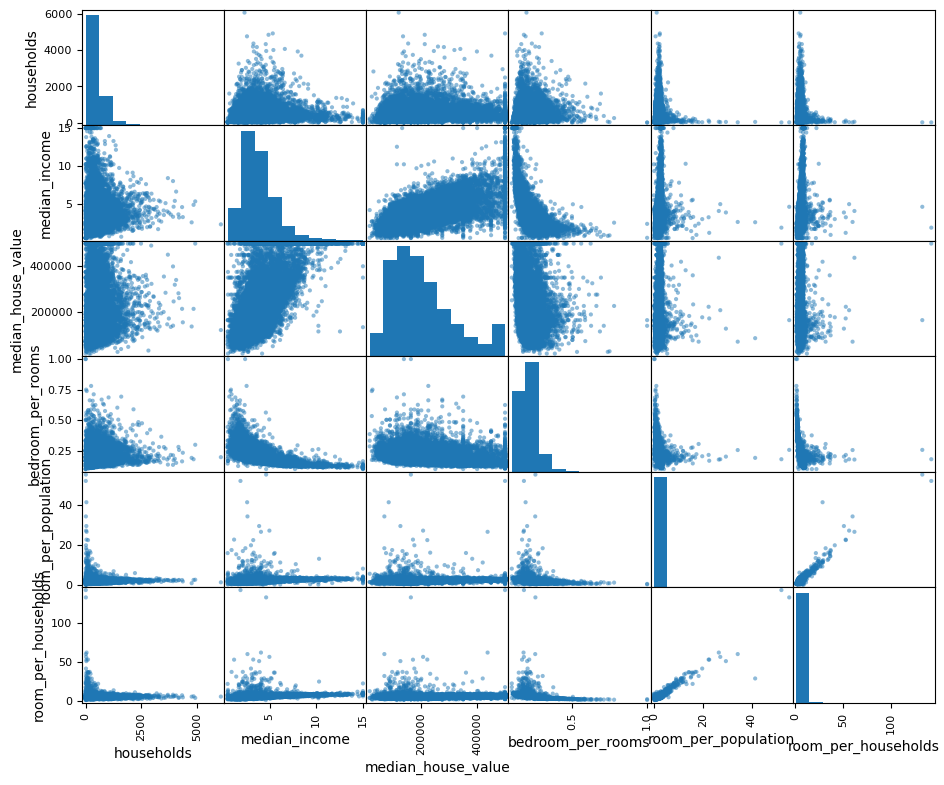

In [163]:
correlation_housing = housing[[ 
                                'households',
                                'median_income',
                                'median_house_value',
                                'bedroom_per_rooms',
                                'room_per_population',
                                'room_per_households']]

pd.plotting.scatter_matrix(correlation_housing,figsize=(11,9));

### Interpretazione dei risultati dell'operazione di correlazione

L'interpretazione dei risultati delle correlazioni durante l'analisi degli attributi in un algoritmo di Machine Learning è un passaggio fondamentale per comprendere le relazioni tra le diverse caratteristiche del dataset e per prendere decisioni informate sulla selezione delle features, sulla pre-elaborazione dei dati e sul design del modello stesso. Ecco alcuni punti chiave su come interpretare queste correlazioni:

- Coefficiente di Correlazione: Il coefficiente di correlazione (spesso il coefficiente di Pearson) misura il grado di relazione lineare tra due variabili. I valori vanno da -1 a +1, dove +1 indica una correlazione positiva perfetta, -1 indica una correlazione negativa perfetta, e 0 indica nessuna correlazione lineare.

- Correlazione Positiva: Una correlazione positiva significa che quando il valore di un attributo aumenta, anche il valore dell'altro tende ad aumentare. Ad esempio, in un dataset immobiliare, potresti trovare una forte correlazione positiva tra la metratura di un immobile e il suo prezzo di vendita.

- Correlazione Negativa: Una correlazione negativa indica che quando il valore di un attributo aumenta, il valore dell'altro tende a diminuire. Per esempio, potrebbe esserci una correlazione negativa tra l'età di un'automobile e il suo prezzo di rivendita.

- Correlazione debole o nulla: Un coefficiente di correlazione vicino a 0 indica una relazione molto debole o assente tra le due variabili. Questo non significa necessariamente che non ci sia alcuna relazione; potrebbe semplicemente indicare che la relazione non è lineare.

- Cautela nell'interpretazione: La correlazione non implica causalità. Anche se due variabili sono fortemente correlate, non significa che una causi l'altra. Potrebbe esserci una variabile nascosta che influisce su entrambe o potrebbe essere una coincidenza.

- Matrice di Correlazione: Utilizzando una matrice di correlazione, che mostra il coefficiente di correlazione tra ogni coppia di attributi nel dataset, è possibile identificare rapidamente le variabili che sono fortemente correlate tra loro. Questo può essere utile per rilevare la multicollinearità, dove due o più variabili predittive sono fortemente correlate tra loro, potenzialmente distorcendo i risultati del modello.

- Visualizzazione: La visualizzazione delle correlazioni tramite heatmap o scatter plot può aiutare a comprendere meglio la natura e la forza delle relazioni tra le variabili.

- Decisioni basate sulla correlazione: Le informazioni ottenute dall'analisi delle correlazioni possono guidare molteplici aspetti del processo di Machine Learning, come la selezione delle features (eliminando le variabili ridondanti fortemente correlate) e la progettazione di nuove features (combinando variabili debolmente correlate per creare indicatori più forti).

-  Il significato e l'importanza delle correlazioni possono variare a seconda del contesto specifico e degli obiettivi dell'algoritmo di Machine Learning. Ad esempio, in alcuni casi, una correlazione debole potrebbe essere preziosa se la variabile correlata offre una prospettiva unica non catturata da altre features.

# Preparare i dati per l'algoritmo di ML

La preparazione dei dati è un passaggio cruciale nel processo di Machine Learning che influisce significativamente sulla performance del modello. Questo processo include varie tecniche per pulire e trasformare i dati in un formato adatto all'addestramento di algoritmi di ML. Di seguito sono illustrate alcune delle tecniche comuni:


## Data Cleaning

Il Data Cleaning è il processo di correzione o rimozione dei dati che sono errati, incompleti, irrilevanti, duplicati o mal formati. Questo passaggio è essenziale per migliorare la qualità dei dati e, di conseguenza, la precisione dei modelli di ML.

**Esempi:**
- Rimozione dei valori nulli o sostituzione con la media/mediana/moda.
- Eliminazione delle righe o delle colonne con troppi dati mancanti.
- Correzione degli errori di digitazione e delle inconsistenze nei dati categorici.

``` python
from sklearn.impute import SimpleImputer
# drop
```

In [164]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 14196 to 15795
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   longitude            16512 non-null  float64
 1   latitude             16512 non-null  float64
 2   housing_median_age   16512 non-null  float64
 3   total_rooms          16512 non-null  float64
 4   total_bedrooms       16349 non-null  float64
 5   population           16512 non-null  float64
 6   households           16512 non-null  float64
 7   median_income        16512 non-null  float64
 8   median_house_value   16512 non-null  float64
 9   ocean_proximity      16512 non-null  object 
 10  bedroom_per_rooms    16349 non-null  float64
 11  room_per_population  16512 non-null  float64
 12  room_per_households  16512 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.8+ MB


### total_bedrooms and bedroom_per_rooms hanno valori nulli

In [165]:
housing[housing.total_bedrooms.isnull() == True] #celle su cui agire

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bedroom_per_rooms,room_per_population,room_per_households
9529,-118.31,33.94,40.0,1550.0,NaN,798.0,270.0,3.7750,153800.0,<1H OCEAN,NaN,1.942356,5.740741
16519,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,264400.0,<1H OCEAN,NaN,1.524687,6.371389
19782,-119.75,34.45,6.0,2864.0,NaN,1404.0,603.0,5.5073,263800.0,NEAR OCEAN,NaN,2.039886,4.749585
1343,-120.32,37.29,38.0,576.0,NaN,478.0,112.0,2.3382,59600.0,INLAND,NaN,1.205021,5.142857
9827,-121.85,36.61,38.0,238.0,NaN,191.0,67.0,1.3897,125000.0,<1H OCEAN,NaN,1.246073,3.552239
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5569,-118.16,34.01,40.0,1552.0,NaN,1919.0,427.0,2.2596,137500.0,<1H OCEAN,NaN,0.808755,3.634660
4835,-120.98,37.60,36.0,1437.0,NaN,1073.0,320.0,2.1779,58400.0,INLAND,NaN,1.339236,4.490625
504,-118.08,33.92,38.0,1335.0,NaN,1011.0,269.0,3.6908,157500.0,<1H OCEAN,NaN,1.320475,4.962825
19065,-118.43,34.20,28.0,3386.0,NaN,2240.0,737.0,3.0221,290100.0,<1H OCEAN,NaN,1.511607,4.594301


#### Calcoliamo media, moda e mediana per la colonna interessata

In [166]:
print(f'Media {housing.total_bedrooms.mean()}')
print(f'Moda {housing.total_bedrooms.mode()}')
print(f'Mediana {housing.total_bedrooms.median()}')

mediana = housing.total_bedrooms.median()

Media 538.9234203926845
Moda 0    280.0
Name: total_bedrooms, dtype: float64
Mediana 437.0


#### Mettiamo la mediana nei valori null della colonna

In [167]:
# housing.loc[housing.total_bedrooms.isnull() == True, 'total_bedrooms'] = mediana

# print(housing.info())

#### Faccio stessa cosa per bedroom_per_rooms

In [168]:
# print(f'Media {housing.bedroom_per_rooms.mean()}')
# print(f'Moda {housing.bedroom_per_rooms.mode()}')
# print(f'Mediana {housing.bedroom_per_rooms.median()}')

# mediana = housing.bedroom_per_rooms.mean()
# print(mediana)

# housing.loc[housing.bedroom_per_rooms.isnull() == True, 'bedroom_per_rooms'] = mediana

# print(housing.info())

### La stessa cosa va fatta sul database di test

In [169]:
housing_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4128 entries, 20046 to 3665
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4128 non-null   float64
 1   latitude            4128 non-null   float64
 2   housing_median_age  4128 non-null   float64
 3   total_rooms         4128 non-null   float64
 4   total_bedrooms      4084 non-null   float64
 5   population          4128 non-null   float64
 6   households          4128 non-null   float64
 7   median_income       4128 non-null   float64
 8   median_house_value  4128 non-null   float64
 9   ocean_proximity     4128 non-null   object 
dtypes: float64(9), object(1)
memory usage: 354.8+ KB


In [170]:
print(f'Media {housing_test.total_bedrooms.mean()}')
print(f'Moda {housing_test.total_bedrooms.mode()}')
print(f'Mediana {housing_test.total_bedrooms.median()}')

mediana = housing_test.total_bedrooms.median()

housing_test.loc[housing_test.total_bedrooms.isnull() == True, 'total_bedrooms'] = mediana

print(housing_test.info())

Media 533.6557296767875
Moda 0    361.0
Name: total_bedrooms, dtype: float64
Mediana 425.0
<class 'pandas.core.frame.DataFrame'>
Index: 4128 entries, 20046 to 3665
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4128 non-null   float64
 1   latitude            4128 non-null   float64
 2   housing_median_age  4128 non-null   float64
 3   total_rooms         4128 non-null   float64
 4   total_bedrooms      4128 non-null   float64
 5   population          4128 non-null   float64
 6   households          4128 non-null   float64
 7   median_income       4128 non-null   float64
 8   median_house_value  4128 non-null   float64
 9   ocean_proximity     4128 non-null   object 
dtypes: float64(9), object(1)
memory usage: 354.8+ KB
None


In [171]:
from sklearn.impute import SimpleImputer

num_housing = housing.drop(columns=['ocean_proximity'])
simple_imputer = SimpleImputer(strategy='median')
simple_imputer.fit(num_housing)


SimpleImputer(strategy='median')

In [172]:
print(simple_imputer.get_feature_names_out())
simple_imputer.statistics_

['longitude' 'latitude' 'housing_median_age' 'total_rooms'
 'total_bedrooms' 'population' 'households' 'median_income'
 'median_house_value' 'bedroom_per_rooms' 'room_per_population'
 'room_per_households']


array([-1.18490000e+02,  3.42500000e+01,  2.90000000e+01,  2.12900000e+03,
        4.37000000e+02,  1.16900000e+03,  4.11000000e+02,  3.52460000e+00,
        1.79200000e+05,  2.03058929e-01,  1.93793103e+00,  5.23242240e+00])

In [173]:
simple_imputer.transform(num_housing)

array([[-117.22      ,   32.75      ,   34.        , ...,    0.18513581,
           2.2611153 ,    5.59794776],
       [-117.03      ,   32.69      ,   10.        , ...,    0.1809101 ,
           1.29083095,    5.39520958],
       [-122.27      ,   37.74      ,   28.        , ...,    0.22492401,
           2.32313383,    4.65566038],
       ...,
       [-119.33      ,   36.28      ,   16.        , ...,    0.20083841,
           2.4363974 ,    5.04615385],
       [-117.19      ,   34.08      ,   22.        , ...,    0.2249696 ,
           1.57434588,    4.99392713],
       [-118.86      ,   34.22      ,   22.        , ...,    0.16260163,
           1.82763744,    6.30769231]])

In [175]:
simple_imputer.__dict__

{'missing_values': nan,
 'add_indicator': False,
 'keep_empty_features': False,
 'strategy': 'median',
 'fill_value': None,
 'copy': True,
 'feature_names_in_': array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
        'total_bedrooms', 'population', 'households', 'median_income',
        'median_house_value', 'bedroom_per_rooms', 'room_per_population',
        'room_per_households'], dtype=object),
 'n_features_in_': 12,
 '_fit_dtype': dtype('float64'),
 'indicator_': None,
 'statistics_': array([-1.18490000e+02,  3.42500000e+01,  2.90000000e+01,  2.12900000e+03,
         4.37000000e+02,  1.16900000e+03,  4.11000000e+02,  3.52460000e+00,
         1.79200000e+05,  2.03058929e-01,  1.93793103e+00,  5.23242240e+00])}

In [184]:
imputer_output = simple_imputer.transform(num_housing)

df = pd.DataFrame(imputer_output, columns= [simple_imputer.get_feature_names_out()], index=[num_housing.index])
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedroom_per_rooms,room_per_population,room_per_households
14196,-117.22,32.75,34.0,6001.0,1111.0,2654.0,1072.0,4.5878,291000.0,0.185136,2.261115,5.597948
8267,-117.03,32.69,10.0,901.0,163.0,698.0,167.0,4.6648,156100.0,0.180910,1.290831,5.395210
17445,-122.27,37.74,28.0,6909.0,1554.0,2974.0,1484.0,3.6875,353900.0,0.224924,2.323134,4.655660
14265,-121.82,37.25,25.0,4021.0,634.0,2178.0,650.0,5.1663,241200.0,0.157672,1.846189,6.186154
2271,-115.98,33.32,8.0,240.0,46.0,63.0,24.0,1.4688,53800.0,0.191667,3.809524,10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
11284,-122.37,37.94,49.0,969.0,229.0,599.0,195.0,1.3167,71600.0,0.236326,1.617696,4.969231
11964,-118.38,33.89,35.0,1778.0,330.0,732.0,312.0,6.5745,379300.0,0.185602,2.428962,5.698718
5390,-119.33,36.28,16.0,2624.0,527.0,1077.0,520.0,2.1250,104200.0,0.200838,2.436397,5.046154
860,-117.19,34.08,22.0,2467.0,555.0,1567.0,494.0,2.6536,84700.0,0.224970,1.574346,4.993927


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 16512 entries, (14196,) to (15795,)
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (longitude,)            16512 non-null  float64
 1   (latitude,)             16512 non-null  float64
 2   (housing_median_age,)   16512 non-null  float64
 3   (total_rooms,)          16512 non-null  float64
 4   (total_bedrooms,)       16512 non-null  float64
 5   (population,)           16512 non-null  float64
 6   (households,)           16512 non-null  float64
 7   (median_income,)        16512 non-null  float64
 8   (median_house_value,)   16512 non-null  float64
 9   (bedroom_per_rooms,)    16512 non-null  float64
 10  (room_per_population,)  16512 non-null  float64
 11  (room_per_households,)  16512 non-null  float64
dtypes: float64(12)
memory usage: 2.2 MB


## Cat Values

I valori categorici devono essere convertiti in un formato numerico per essere elaborati dagli algoritmi di ML. Ciò può essere fatto attraverso varie tecniche di codifica.

**Esempi:**
- **Codifica One-Hot**: Trasforma ogni categoria in una nuova colonna e assegna 1 o 0 (True/False). Adatto per variabili categoriche nominali senza un ordine intrinseco.
- **Codifica Ordinale**: Assegna un numero unico a ciascuna categoria in base all'ordine. Usato per variabili categoriche ordinali che hanno un livello o un ordine.

```python
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
```


## Feature Scaling

Il Feature Scaling è usato per standardizzare la gamma di variabili indipendenti del dataset. Questo è importante perché gli algoritmi di ML basati sulla distanza (come k-NN, SVM e gradient descent) sono sensibili alle scale delle features.


### Min-Max Scaler

Il Min-Max Scaling ridimensiona i dati nel range [0, 1] o [-1, 1] utilizzando il minimo e il massimo valore delle caratteristiche. È utile quando si conoscono i limiti precisi dei dati.

`Xnorm = (X - Xmin) / (Xmax - Xmin)`

```python
from sklearn.preprocessing import MinMaxScaler
```


### Standardizzazione

La standardizzazione (o Z-score normalization) ridimensiona i dati in modo che abbiano una media di 0 e una deviazione standard di 1, seguendo approssimativamente una distribuzione normale.

**Formula:** `Z = (X - μ) / σ`

Dove `μ` è la media e `σ` è la deviazione standard delle caratteristiche.


```python
from sklearn.preprocessing import StandardScaler
```

**Nota:** È importante applicare il feature scaling dopo la divisione del dataset in set di addestramento e test per evitare il data leakage.

# Selezionare e addestrare un modello

## Addestrare il training set


```python
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
```
## Valutare il training set
```python
from sklearn.metrics import mean_squared_error
```

## Cross-Validation

```python
from sklearn.model_selection import cross_val_scores

```